<font size=4 face='黑体'>单层全连接层的线性回归

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential  #按顺序构成的模型
from keras.layers import Dense  #全连接层

H:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
x_data = np.random.rand(100)
noise = np.random.normal(0,0.01,x_data.shape)
y_data = x_data * 0.5 + 0.1 + noise

cost: 0.01736876
cost: 0.002668652
cost: 0.00076903263
cost: 0.00027797662
cost: 0.0001510373
cost: 0.000118222095
cost: 0.00010973906
cost: 0.00010754618
cost: 0.00010697932


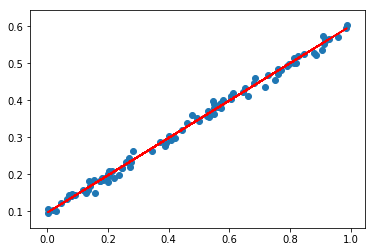

In [5]:
#构建一个顺序模型
model = Sequential()
#在模型中添加一个全连接层
model.add(Dense(units=1,input_dim=1))  #units:输出层的维度，input_dim:输入层的维度
model.compile(optimizer='sgd',loss='mse')

for step in range(4001):
    cost = model.train_on_batch(x_data,y_data)
    if step%500 == 0:
        print('cost:',cost)
        
W,b = model.layers[0].get_weights()

y_pre = model.predict(x_data)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pre,'r-')
plt.show()

<font size=4 face='黑体'>一层隐藏层的非线性回归

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

H:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x_data = np.linspace(-0.5,0.5,200)
noise = np.random.normal(0,0.02,200)
y_data = np.square(x_data) + noise

cost: 0.031348016
cost: 0.0067621986
cost: 0.003690329
cost: 0.0012803478
cost: 0.00063723495
cost: 0.00052419765
cost: 0.0005075533


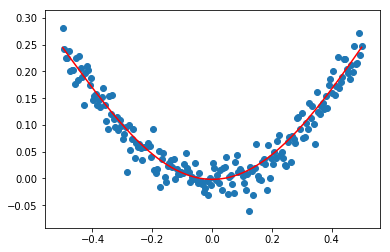

In [3]:
#构建一个顺序模型
model = Sequential()
#在模型中添加一个全连接层
model.add(Dense(units=10,input_dim=1,activation='tanh'))  #units:输出层的维度，input_dim:输入层的维度
#model.add(Activation('tanh'))
model.add(Dense(units=1,activation='tanh'))
#model.add(Activation('tanh'))
sgd = SGD(lr=0.3)

model.compile(optimizer=sgd,loss='mse')

for step in range(3001):
    cost = model.train_on_batch(x_data,y_data)
    if step%500 == 0:
        print('cost:',cost)
        

y_pre = model.predict(x_data)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pre,'r-')
plt.show()